# Data Story

### Import librarys and cleaned data set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/diabetic_data_clean.csv', header=0)
df.shape

(71050, 41)

## Q1. What are the relationships between numerical variables and readmission?

### Approach: Create scratterlots of numerical variables and label readmission categories to check whether there are correlation trends between them. Create boxplot of numerical variables seperated by readmission categories.

- Scatterplot of variables `num_procedures`, `number_diagnoses`, `num_medications`,`num_lab_procedures`. Those four numerical variables are about how many procedures/diagnoses/medications have been given and they are in similar scales.

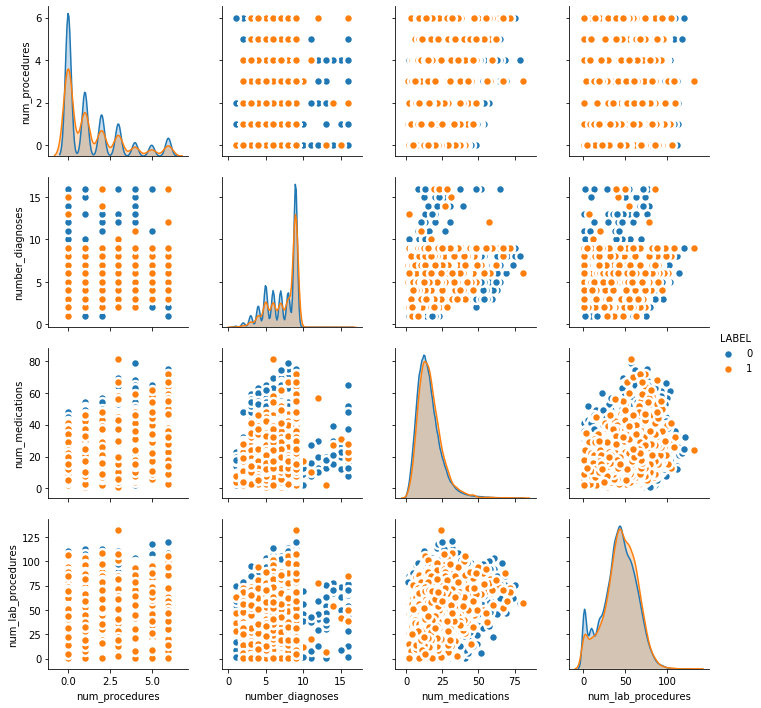

In [3]:
sns.pairplot(df, vars = ['num_procedures', 'number_diagnoses', 'num_medications','num_lab_procedures'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Scatterplot of variables `number_outpatient`, `number_inpatient`, `number_emergency`, `num_lab_procedures`. Those three numerical variables are about different type of clinic/hospital visits in the year precdeing the encounter and they are in similar scales.

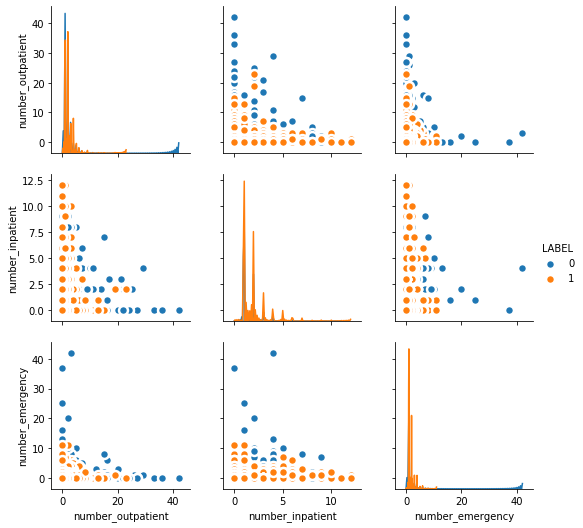

In [4]:
sns.pairplot(df, vars = ['number_outpatient', 'number_inpatient','number_emergency'],
             kind="scatter", hue="LABEL",  plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

- Boxplot of numerical variables by readmission catetories (0, 1).

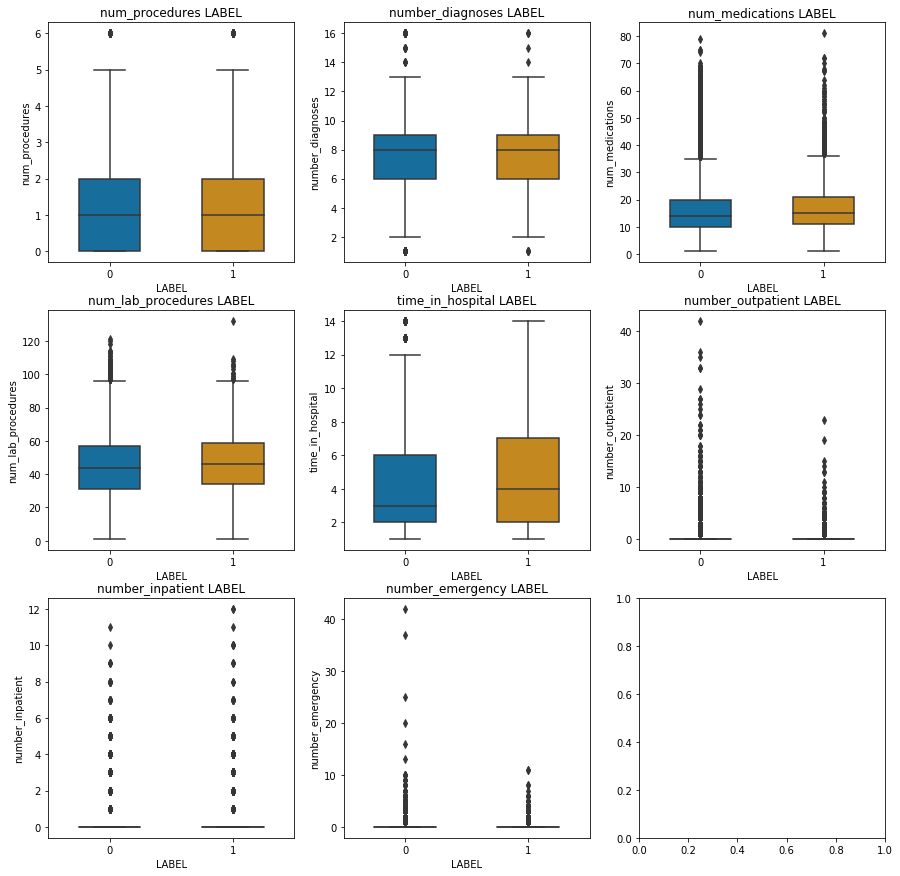

In [5]:
def bplot_label(df, col, ax=None):
    bplot = sns.boxplot(y=col, x='LABEL', 
                        data=df, width=0.5, 
                        palette="colorblind", ax=ax)
    bplot.set_title(col + ' LABEL')
    #plt.show()
    
fig, axes = plt.subplots(3,3,figsize=(15,15))
bplot_label(df, 'num_procedures', ax=axes[0,0])
bplot_label(df, 'number_diagnoses', ax=axes[0,1])
bplot_label(df, 'num_medications', ax=axes[0,2])
bplot_label(df, 'num_lab_procedures', ax=axes[1,0])
bplot_label(df, 'time_in_hospital', ax=axes[1,1])
bplot_label(df, 'number_outpatient', ax=axes[1,2])
bplot_label(df, 'number_inpatient', ax=axes[2,0])
bplot_label(df, 'number_emergency', ax=axes[2,1])

### Results and conclusions
- Low posistive correlations are present between `num_medications` and `num_lab_procedures`, `num_medications` and `number_diagnoses`
- No linear relationships between different type of hospital/clinic visits preceding the encounters.
- Readmission has relationships with those numerical variables: 
    * Readmissions tend to be associated with *low* `number_emergency` and `number_outpatient`.
    * The longer time stay (between 1 day and 14 days) in hospital, the more chance to have readmission.

## Q2. What are the relationships between categorical variables and readmissions?

### Approach: Create barplots of those categorical variables by readmission categories. Create contingency tables.

- Bar plot of categorical variables `gender`, `age`, `race`, `discharge_disposition_id`, `max_glu_serum`, `A1Cresult` vs `LABEL`.

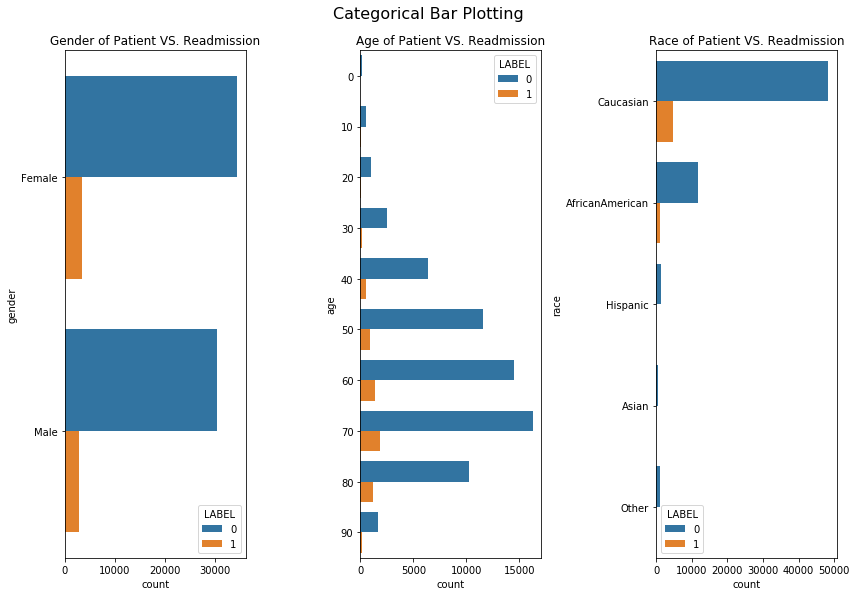

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12,8))

sns.countplot(y = df['gender'], hue = df['LABEL'], ax=axes[0]).set_title('Gender of Patient VS. Readmission')
sns.countplot(y = df['race'], hue = df['LABEL'], ax=axes[2]).set_title('Race of Patient VS. Readmission')
sns.countplot(y = df['age'], hue = df['LABEL'], ax=axes[1]).set_title('Age of Patient VS. Readmission')

fig.suptitle('Categorical Bar Plotting', y=1.03, fontsize=16)

plt.tight_layout()
plt.show()

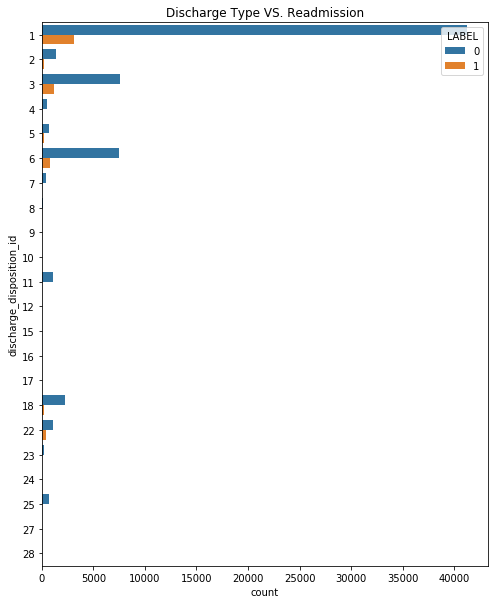

In [7]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y = df['discharge_disposition_id'], hue = df['LABEL']).set_title('Discharge Type VS. Readmission')
plt.show()

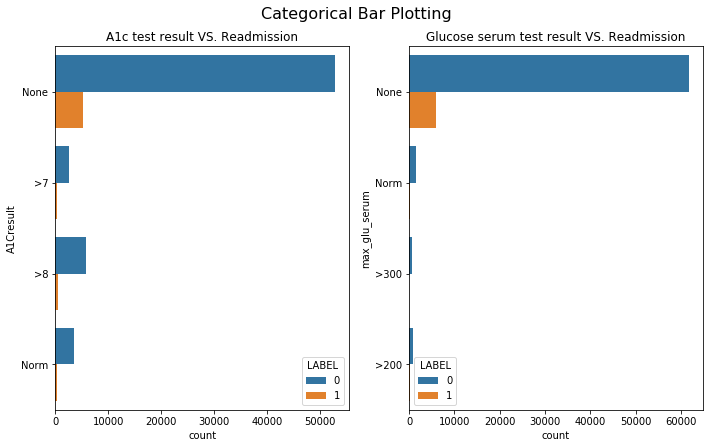

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10,6))

sns.countplot(y = df['A1Cresult'], hue = df['LABEL'], ax=axes[0]).set_title('A1c test result VS. Readmission')
sns.countplot(y = df['max_glu_serum'], hue = df['LABEL'], ax=axes[1]).set_title('Glucose serum test result VS. Readmission')

fig.suptitle('Categorical Bar Plotting', y=1.03, fontsize=16)

plt.tight_layout()
plt.show()

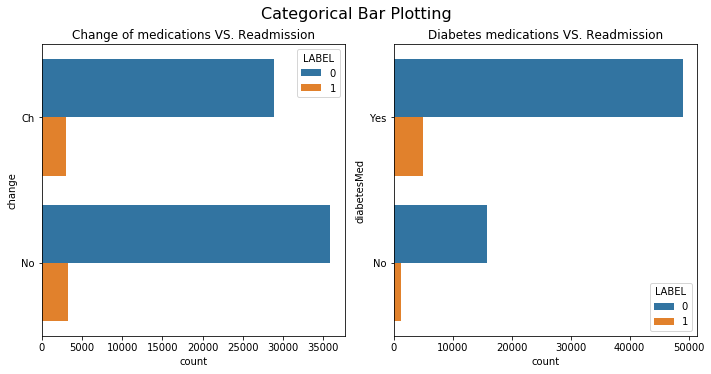

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

sns.countplot(y = df['change'], hue = df['LABEL'], ax=axes[0]).set_title('Change of medications VS. Readmission')
sns.countplot(y = df['diabetesMed'], hue = df['LABEL'], ax=axes[1]).set_title('Diabetes medications VS. Readmission')

fig.suptitle('Categorical Bar Plotting', y=1.03, fontsize=16)

plt.tight_layout()
plt.show()

In [10]:
df = df.assign(A1Cresult_1 = [A1Cresult if A1Cresult in ['Norm','None'] else 'High' for A1Cresult in df['A1Cresult']]) 

In [11]:
tbl_2way = pd.pivot_table(df, values='encounter_id', index=['A1Cresult_1', 'change'], columns='LABEL', aggfunc='count', margins=True)
tbl_2way

LABEL                   0     1    All
A1Cresult_1 change                    
High        Ch       5036   473   5509
            No       3387   282   3669
None        Ch      22360  2359  24719
            No      30539  2840  33379
Norm        Ch       1482   139   1621
            No       1969   184   2153
All                 64773  6277  71050

In [12]:
r1 = tbl_2way.iloc[1,2]/tbl_2way.iloc[6,2]
r2 = tbl_2way.iloc[1,1]/tbl_2way.iloc[1,2]
print('The total encounters are {}.'.format(tbl_2way.iloc[6,2]))
print('The total encounters of High A1C result and No change of medication are {}.'.format(tbl_2way.iloc[1,2]))
print('The total encounters of High A1C result and No change of medication and having readmission are {}.'.format(tbl_2way.iloc[1,1]))

print('\nThe percentage of High A1C result and No change of medication and having readmission is {:.2%}.'.format(r1))
print('The percentage of High A1C result and No change of medication and having readmission and having readmission is {:.2%}.'.format(r2))

The total encounters are 71050.
The total encounters of High A1C result and No change of medication are 3669.
The total encounters of High A1C result and No change of medication and having readmission are 282.

The percentage of High A1C result and No change of medication and having readmission is 5.16%.
The percentage of High A1C result and No change of medication and having readmission and having readmission is 7.69%.


### Results and conclusions
- From bar plots, it is hard to tell readmission is associated with which categorical variables.
- From two-way contingency table, readmission is **overrepresented** in group (High A1C result and No change of medication) when comparing encounter percentage of 7.69% to 5.16%. But this conclusion needs to be proved in a statistical test.
- If the test of association is significant, then High A1C result but without change of medication tends to have high chance of readmission.